# What are the main determinants of health insurance costs?

Importing and cleaning the data

In [1]:
# import modules
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import csv into pandas file
insurance_csv = Path('insurance.csv')
insurance_df = pd.read_csv(insurance_csv)
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# check for null values
insurance_df.isnull().values.any()
#insurance_df.dropna()

False

In [4]:
# find duplicates
insurance_df.duplicated().sum()

1

In [5]:
#remove duplicates
insurance_df = insurance_df.drop_duplicates()
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


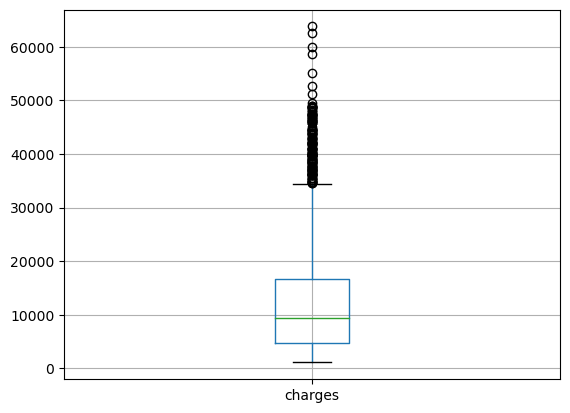

In [6]:
# boxplot of values and outliers
insurance_df.boxplot(column="charges")
plt.show()

In [7]:
insurance_high = insurance_df.loc[insurance_df["charges"] >= 35000]
insurance_high

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


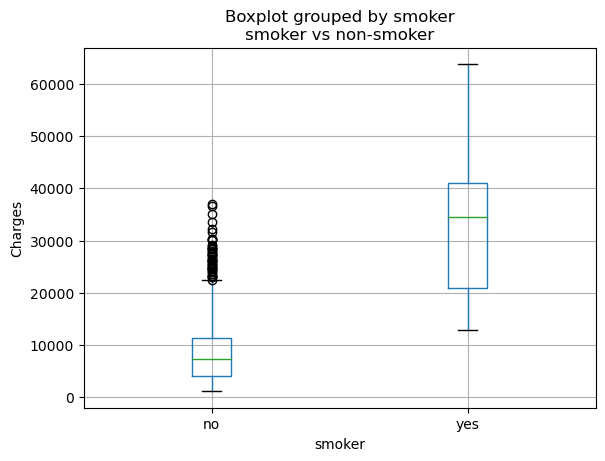

In [7]:
# box plots for smokers and non-smokers
insurance_df.boxplot(column="charges", by="smoker")
plt.xlabel("smoker")
plt.ylabel("Charges")
plt.title("smoker vs non-smoker")
plt.show()

In [ ]:
# find and remove outliers --- Remove
quartiles= insurance_df["charges"].quantile([.25,.5,.75])
lowerq= quartiles[.25]
upperq= quartiles[.75]
iqr= upperq-lowerq
lower_bound = lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)
insurance_df= insurance_df.loc[(insurance_df["charges"]>=lower_bound) |\
                                     (insurance_df["charges"]<upper_bound)]

Descriptive Statistics

In [9]:
# print descriptive statistics 
insurance_df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


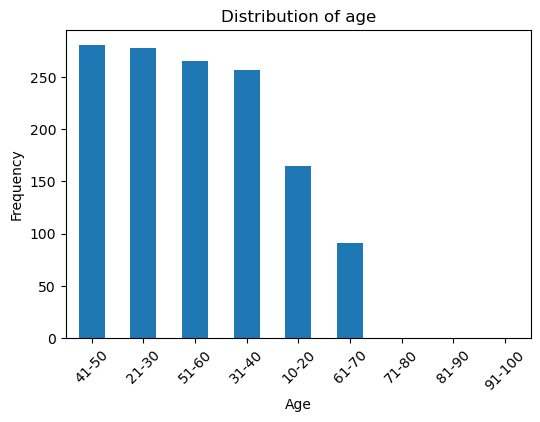

In [11]:
# distribution of age
age = [10, 20, 30, 40, 50, 60 , 70, 80 ,90, 100]
labels = ["10-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"]

#insurance_df["age"] = pd.cut(insurance_df["age"], bins=age, labels=labels, include_lowest=True)
insurance_df["age"] = pd.Categorical(insurance_df["age"], categories=labels, ordered=True)
#sort_age = insurance_df["age"].value_counts()
age_count=insurance_df["age"].value_counts().plot(kind="bar", figsize=(6,4), rot=45)
plt.title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

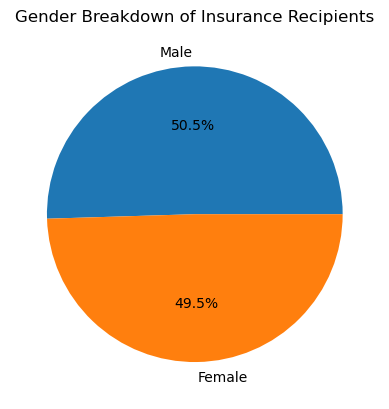

In [10]:
# pie charts of gender percentage 
categories=["Male","Female"]
gender_count=insurance_df["sex"].value_counts()
# gender_count
plt.pie(gender_count, labels=categories, autopct='%1.1f%%')
plt.title("Gender Breakdown of Insurance Recipients")
plt.show()

In [11]:
#groupby gender
gender_groupby = insurance_df.groupby("sex").mean()
gender_groupby


,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.946667,30.943652,1.117037,13974.998864


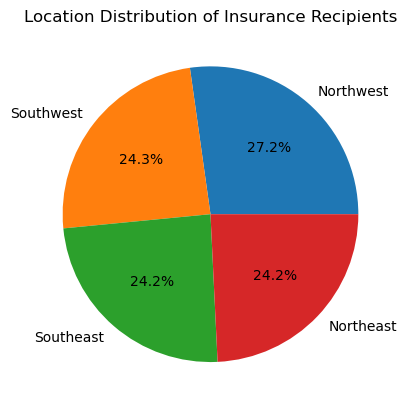

In [12]:
# region percentage pie chart 
categories=["Northwest","Southwest","Southeast","Northeast"]
region_count= insurance_df["region"].value_counts()
#region_count
plt.pie(region_count, labels=categories, autopct='%1.1f%%')
plt.title("Location Distribution of Insurance Recipients")
plt.show()

In [13]:
#groupby region
region_groupby = insurance_df.groupby("region").mean()
region_groupby


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.259259,29.195494,1.151235,12450.840844
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


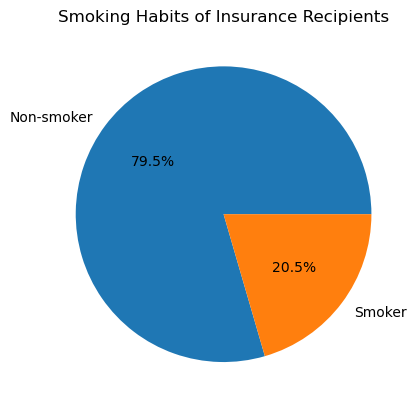

In [14]:
# percentage of smokers 
categories=["Non-smoker","Smoker"]
smoker_count=insurance_df["smoker"].value_counts()
plt.pie(smoker_count, labels=categories, autopct='%1.1f%%')
plt.title("Smoking Habits of Insurance Recipients")
plt.show()

In [15]:
#groupby smokers
smoker_groupby = insurance_df.groupby("smoker").mean()
smoker_groupby

,age,bmi,children,charges
smoker,,,,
no,39.404516,30.651853,1.091251,8440.660307
yes,38.514599,30.708449,1.113139,32050.231832


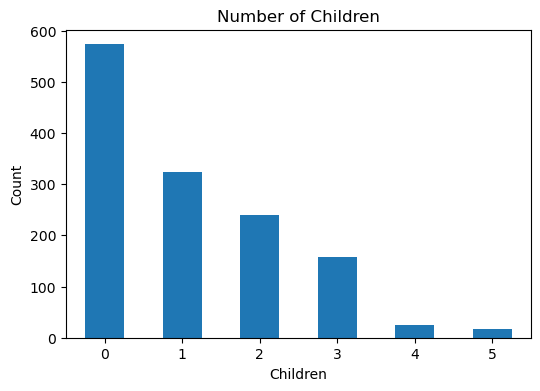

In [16]:
# number of children bar chart 
children_count=insurance_df["children"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("Number of Children")
plt.xlabel("Children")
plt.ylabel("Count")
plt.show()

In [17]:
#children groupby
children_groupby = insurance_df.groupby("children").mean()
children_groupby

,age,bmi,charges
children,,,
0,38.478185,30.550227,12384.695344
1,39.453704,30.623148,12731.171832
2,39.445833,30.978104,15073.563734
3,41.566879,30.684331,15355.318367
4,39.000000,31.391200,13850.656311
5,35.611111,29.605000,8786.035247


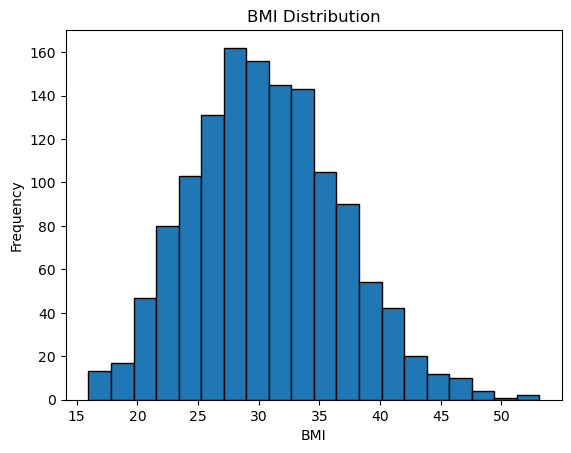

In [18]:
# bmi histogram 
plt.hist(insurance_df["bmi"], bins=20, edgecolor='black')
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("BMI Distribution")
plt.show()

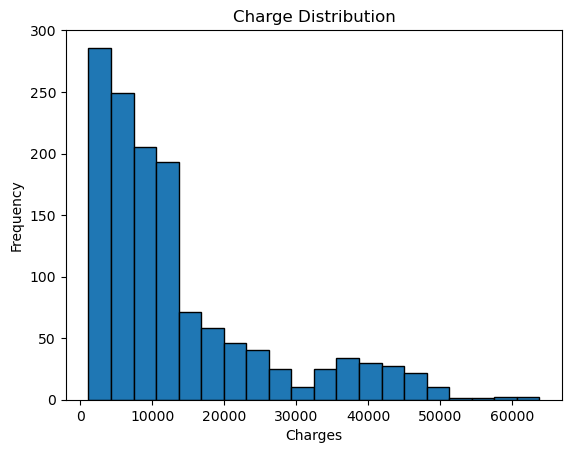

In [19]:
# insurance cost histogram
plt.hist(insurance_df["charges"], bins=20, edgecolor='black')
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Charge Distribution")
plt.show()

Relationships between independent variables

In [ ]:
# print correlations --> don't do scatterplots 

Relationships between independent variables and health insurance costs

In [ ]:
# graph 1: bmi vs. insurance costs (scatterplot)


In [ ]:
# graph 2: age vs. insurance costs (scatterplot)

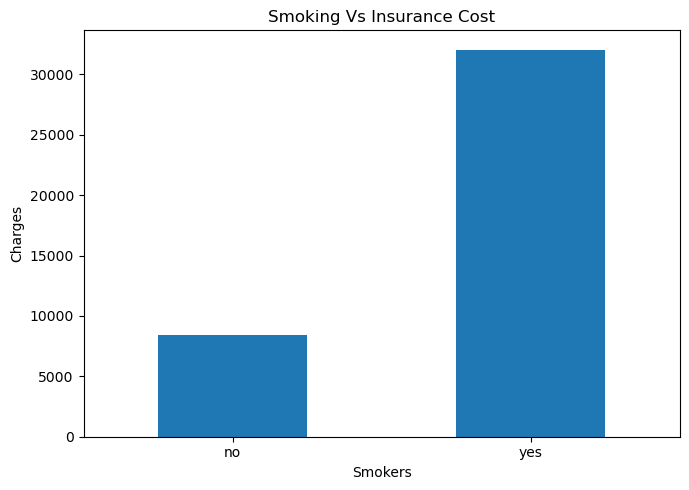

In [20]:
# graph 3: smoking vs. insurance costs (bar graph)
smoker_cost = smoker_groupby["charges"]
smoker_cost.plot(kind="bar", figsize=(7,5), rot=0)

plt.xlabel("Smokers")
plt.ylabel("Charges")
plt.title("Smoking Vs Insurance Cost")
plt.tight_layout()
plt.show()

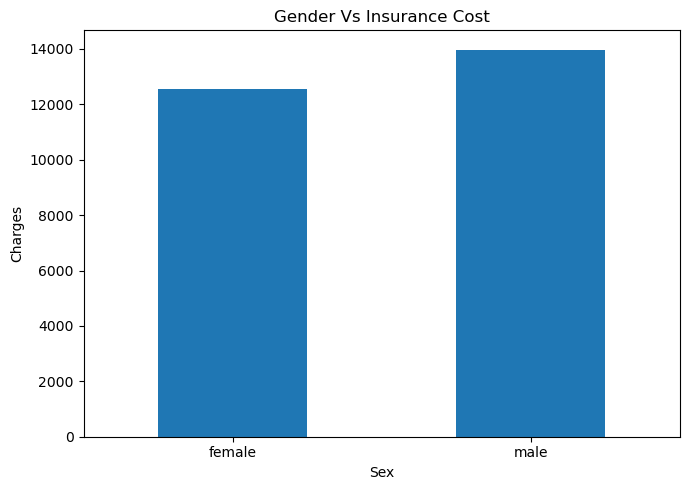

In [21]:
# graph 4: gender vs. insurance costs (bar graph)

gender_cost = gender_groupby["charges"]
gender_cost.plot(kind="bar", figsize=(7,5), rot=0)

plt.xlabel("Sex")
plt.ylabel("Charges")
plt.title("Gender Vs Insurance Cost")
plt.tight_layout()
plt.show()

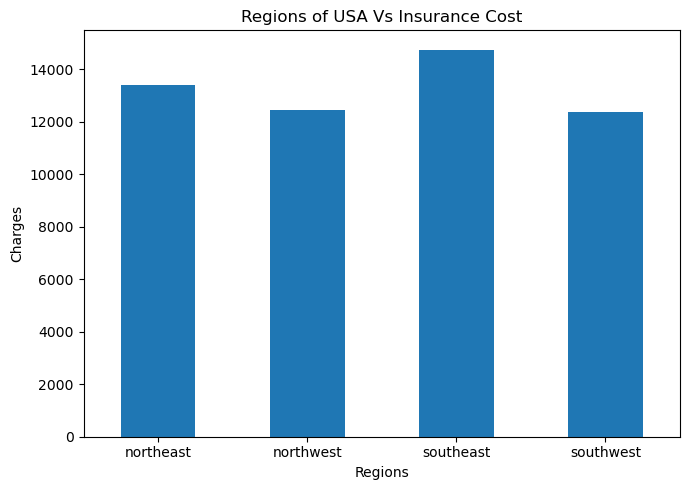

In [22]:
# graph 5: region of the country (bar graph)
region_cost = region_groupby["charges"]
region_cost.plot(kind="bar", figsize=(7,5), rot=0)

plt.xlabel("Regions")
plt.ylabel("Charges")
plt.title("Regions of USA Vs Insurance Cost")
plt.tight_layout()
plt.show()

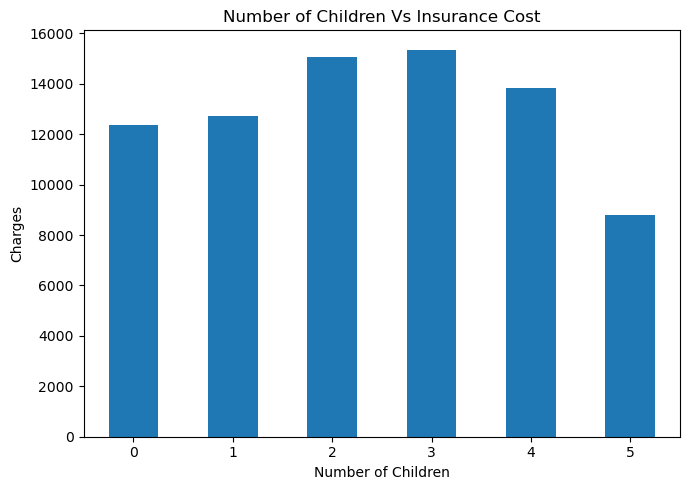

In [23]:
# graph 6: # of children vs. insurance costs (bar graph)
children_cost = children_groupby["charges"]
children_cost.plot(kind="bar", figsize=(7,5), rot=0)

plt.xlabel("Number of Children")
plt.ylabel("Charges")
plt.title("Number of Children Vs Insurance Cost")
plt.tight_layout()
plt.show()

In [ ]:
# regression 
# insurance costs = a0 + a1*bmi + a2*age + a3*dummy1 + 